# K-nearest neighbors (KNN)

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.
However, it is mainly used for classification predictive problems in industry. 
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

Pros:
It is very useful for nonlinear data because there is no assumption about data in this algorithm.

cons:
It is computationally a bit expensive algorithm because it stores all the training data.
Prediction is slow in case of big N.

In [52]:
import pandas as pd
import numpy as np

In [53]:
glass = pd.read_csv('glass.csv')

In [54]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [55]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [56]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [57]:
#there is difference in the scale of the values,so we normalise the data.



def norm_fumc(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [58]:
norm = norm_fumc(glass.iloc[:,0:9])
glass1 = glass.iloc[:,9]

In [59]:
#Splitting the data into train and test data using stratified sampling

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(norm,glass1,test_size = 0.4,stratify = glass1)

In [60]:
#checking the value counts:


glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [61]:
y_train.value_counts()

2    46
1    42
7    17
3    10
5     8
6     5
Name: Type, dtype: int64

In [62]:
y_test.value_counts()

2    30
1    28
7    12
3     7
5     5
6     4
Name: Type, dtype: int64

In [63]:
#Model building

In [64]:
from sklearn.neighbors import KNeighborsClassifier as KN

In [65]:
model = KN(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
# accuracy of the model on training data
train_acc = np.mean(model.predict(x_train)==y_train)

In [67]:
train_acc

0.75

In [68]:
#Accuracy = 75%

In [69]:
#Accuracy on test data
test_acc = np.mean(model.predict(x_test)==y_test)

In [70]:
test_acc

0.6162790697674418

In [71]:
#accuracy = 61%

In [72]:
#Changing the K value

model2 = KN(n_neighbors = 9)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [73]:
#Accuracy on training data
train2_acc = np.mean(model2.predict(x_train)==y_train)

In [74]:
train2_acc

0.65625

In [75]:
#Accuracy = 65%

In [76]:
#Accuracy on test data
test2_acc = np.mean(model2.predict(x_test)==y_test)

In [77]:
test2_acc

0.6162790697674418

In [78]:
#Accuracy  = 61%

In [79]:
#creating empty list variable 
acc = []

In [80]:
#running KNN algorithm for 3 to 50 nearest neighbours and 
# storing the accuracy values 

In [81]:
for i in range (4,30,1):
    model = KN(n_neighbors = i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc, test_acc])

In [82]:
import matplotlib.pyplot as plt

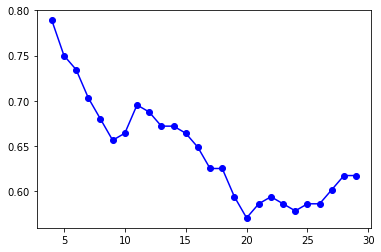

In [83]:
# plot on Training accuracy
plt.plot(np.arange(4,30,1),[i[0] for i in acc],'bo-')

In [84]:
# plot on Test accuracy

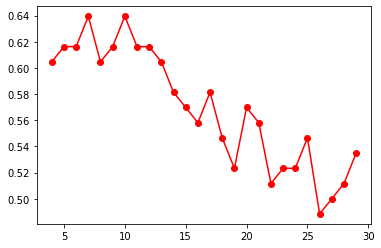

In [85]:
plt.plot(np.arange(4,30,1),[i[1] for i in acc],'ro-')

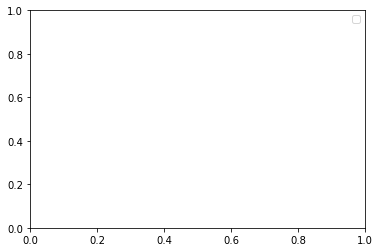

In [86]:
plt.legend(["train","test"])

In [87]:
model3 = KN(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [88]:
pred_train = model3.predict(x_train)
cross_tab_train = pd.crosstab(y_train,pred_train)

In [89]:
train_accuracy = np.mean(pred_train == y_train)
train_accuracy

0.734375

In [90]:
#  accuracy = 73%

In [91]:
pred_test = model3.predict(x_test)
cross_tab_test = pd.crosstab(y_test,pred_test)

In [92]:
test_accuracy=np.mean(pred_test ==y_test)
test_accuracy

0.6162790697674418

In [93]:
# accuracy = 61%